In [8]:
from datetime import datetime, time, timedelta

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from ocf_blosc2 import Blosc2

In [9]:
###HRV
hrv_1 = xr.open_dataset(
    "/data/climatehack/official_dataset/hrv/2020/7.zarr.zip",
    engine="zarr",
    consolidated=True,
)
hrv_2 = xr.open_dataset(
    "/data/climatehack/official_dataset/hrv/2021/1.zarr.zip",
    engine="zarr",
    consolidated=True,
)

print("time stamps are every: ", hrv_1["time"][2].item() - hrv_1["time"][1].item(), " ns (5 mins)")
hrv_1

time stamps are every:  300000000000  ns (5 mins)


<xarray.Dataset>
Dimensions:                      (channel: 1, time: 6721, y_geostationary: 592,
                                  x_geostationary: 684)
Coordinates:
  * channel                      (channel) <U3 'HRV'
  * time                         (time) datetime64[ns] 2020-07-01T04:00:00 .....
  * x_geostationary              (x_geostationary) float64 -1.089e+06 ... -4....
  * y_geostationary              (y_geostationary) float64 4.449e+06 ... 5.04...
Data variables:
    data                         (time, y_geostationary, x_geostationary, channel) float16 ...
    x_geostationary_coordinates  (time, x_geostationary) float64 ...
    y_geostationary_coordinates  (time, y_geostationary) float64 ...

2020-07-22 04:35:00


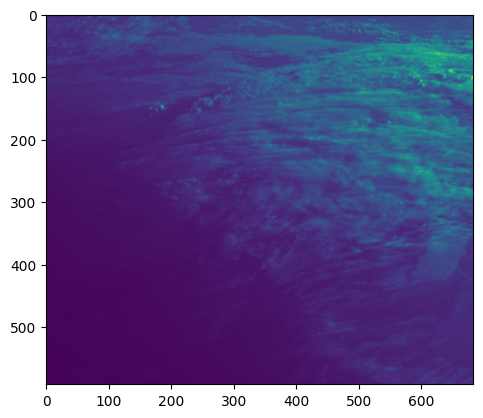

In [43]:
def get_hrv_at_time(year, month, day, hour, minute):
    assert year in [2020, 2021], "year not 2020 or 2021"
    assert minute % 5 == 0, "minute not multiple of 5"
    assert 4 <= hour <= 21, "hour not between 4 and 21"
    try: 
        date = datetime(year=year, month=month, day=day, hour=hour, minute=minute)
        print(date)
    except:
        print("date invalid")
        return
    hrv = xr.open_dataset(
        f"/data/climatehack/official_dataset/hrv/{year}/{month}.zarr.zip",
        engine="zarr",
        consolidated=True,
    )
    return hrv["data"].sel(time=date).to_numpy()[::-1]

plt.imshow(get_hrv_at_time(2020, 7, 22, 4, 35))

2020-07-22 04:35:00


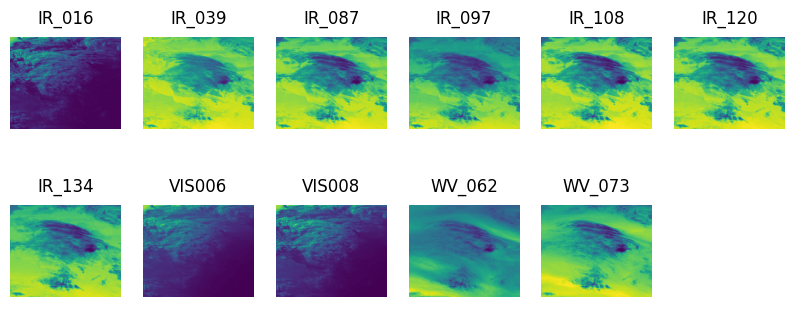

In [61]:
##nonhrv
def get_nonhrv_at_time(year, month, day, hour, minute):
    assert year in [2020, 2021], "year not 2020 or 2021"
    assert minute % 5 == 0, "minute not multiple of 5"
    assert 4 <= hour <= 21, "hour not between 4 and 21"
    try: 
        date = datetime(year=year, month=month, day=day, hour=hour, minute=minute)
        print(date)
    except:
        print("date invalid")
        return
    nonhrv = xr.open_dataset(
        f"/data/climatehack/official_dataset/nonhrv/{year}/{month}.zarr.zip",
        engine="zarr",
        consolidated=True,
    )
    return nonhrv["data"].sel(time=date).to_numpy()[::-1]

def plot_nonhrv_at_time(year, month, day, hour, minute):
    channel_names = np.array(['IR_016', 'IR_039', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134', 'VIS006', 'VIS008', 'WV_062', 'WV_073'], dtype='<U6')
    to_plot = get_nonhrv_at_time(year, month, day, hour, minute)

    num_rows, num_cols, num_images = 2, 6, 11
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4))

    # Plot each image in the grid
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < num_images:
                axes[i, j].imshow(to_plot[:,:,index])  # Assuming grayscale images
                axes[i, j].set_title(channel_names[index])
            axes[i, j].axis('off')  # Turn off axis labels for cleaner display
            


plot_nonhrv_at_time(2020, 7, 22, 4, 35)

In [74]:
nwp = xr.open_dataset(
    "/data/climatehack/official_dataset/weather/2020/7.zarr.zip",
    engine="zarr",
    consolidated=True,
)

data_vars = np.array(list(nwp.data_vars.keys()))
print(list(data_vars))

['alb_rad', 'aswdifd_s', 'aswdir_s', 'cape_con', 'clch', 'clcl', 'clcm', 'clct', 'h_snow', 'omega_1000', 'omega_700', 'omega_850', 'omega_950', 'pmsl', 'relhum_2m', 'runoff_g', 'runoff_s', 't_2m', 't_500', 't_850', 't_950', 't_g', 'td_2m', 'tot_prec', 'u_10m', 'u_50', 'u_500', 'u_850', 'u_950', 'v_10m', 'v_50', 'v_500', 'v_850', 'v_950', 'vmax_10m', 'w_snow', 'ww', 'z0']


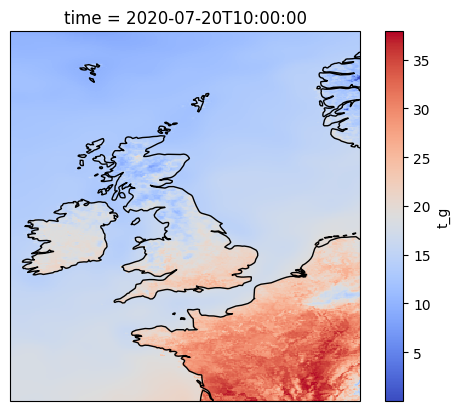

In [58]:
#numerical weather forcasts
def get_weather_at_time(year, month, day, hour, minute):
    assert year in [2020, 2021], "year not 2020 or 2021"
    assert minute % 5 == 0, "minute not multiple of 5"
    assert 4 <= hour <= 21, "hour not between 4 and 21"
    try: 
        date = datetime(year=year, month=month, day=day, hour=hour, minute=minute)
        print(date)
    except:
        print("date invalid")
        return
    weather = xr.open_dataset(
        f"/data/climatehack/official_dataset/weather/{year}/{month}.zarr.zip",
        engine="zarr",
        consolidated=True,
    )
    axes = plt.axes(projection=ccrs.PlateCarree())

    return weather["data"].sel(time=date).to_numpy()[::-1]

axes = plt.axes(projection=ccrs.PlateCarree())

(nwp["t_g"].sel(time="2020-07-20 10:00") - 273.15).plot.pcolormesh(
    ax=axes,
    transform=ccrs.PlateCarree(),
    x="longitude",
    y="latitude",
    add_colorbar=True,
    cmap="coolwarm",
)  # type: ignore

axes.coastlines()